# Tutorial on getting hands on the event data for a single match.
-----


*author: aliha*

*twitter: @rockingAli5* 


# Import modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from selenium import webdriver
import main
import visuals
import seaborn as sns

# Get match data

In [3]:
if __name__ == "__main__":
    driver = webdriver.Chrome('chromedriver.exe')
    
# whoscored match centre url of the required match (Example: Barcelona vs Sevilla)
url = "https://1xbet.whoscored.com/Matches/1642408/Live/Scotland-Premiership-2022-2023-Dundee-United-Rangers"
match_data = main.getMatchData(driver, url, close_window=True)

# Match dataframe containing info about the match
matches_df = main.createMatchesDF(match_data)

# Events dataframe      
events_df = main.createEventsDF(match_data)

# match Id
matchId = match_data['matchId']

# Information about respective teams as dictionary
home_data = matches_df['home'][matchId]
away_data = matches_df['away'][matchId]

C:\Users\angus\AppData\Local\Temp\ipykernel_35260\2108725615.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('chromedriver.exe')


Region: Scotland, League: Premiership, Season: 2022/2023, Match Id: 1642408


c:\Users\angus\OneDrive\Documents\Python_Projects\SPL_analysis\main.py:484: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  matches_df = matches_df.append(matches_dict, ignore_index=True)
c:\Users\angus\OneDrive\Documents\Python_Projects\SPL_analysis\main.py:471: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  events_df[event_type] = pd.Series([event_type in row for row in list(events_df['satisfiedEventsTypes'])])
c:\Users\angus\OneDrive\Documents\Python_Projects\SPL_analysis\main.py:471: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once usin

# Calculate EPV for successful passes

In [4]:
events_df = main.addEpvToDataFrame(events_df)

# Get data for multiple matches

## getting competition urls

In [16]:
league_urls = main.getLeagueUrls()
league_urls

{'Premier League': 'https://1xbet.whoscored.com/Regions/252/Tournaments/2/England-Premier-League',
 'Serie A': 'https://1xbet.whoscored.com/Regions/108/Tournaments/5/Italy-Serie-A',
 'LaLiga': 'https://1xbet.whoscored.com/Regions/206/Tournaments/4/Spain-LaLiga',
 'Bundesliga': 'https://1xbet.whoscored.com/Regions/81/Tournaments/3/Germany-Bundesliga',
 'Ligue 1': 'https://1xbet.whoscored.com/Regions/74/Tournaments/22/France-Ligue-1',
 'Liga Portugal': 'https://1xbet.whoscored.com/Regions/177/Tournaments/21/Portugal-Liga-Portugal',
 'Eredivisie': 'https://1xbet.whoscored.com/Regions/155/Tournaments/13/Netherlands-Eredivisie',
 'Russian Premier League': 'https://1xbet.whoscored.com/Regions/182/Tournaments/77/Russia-Premier-League',
 'Brasileirão': 'https://1xbet.whoscored.com/Regions/31/Tournaments/95/Brazil-Brasileir%C3%A3o',
 'Major League Soccer': 'https://1xbet.whoscored.com/Regions/233/Tournaments/85/USA-Major-League-Soccer',
 'Super Lig': 'https://1xbet.whoscored.com/Regions/225/Tou

## getting match urls for that competition and season

In [17]:
match_urls = main.getMatchUrls(comp_urls=league_urls, competition='Premiership', season='2022/2023')
match_urls[:5]

[{'away': 'Dundee United',
  'date': 'Jul 30 2022',
  'home': 'Kilmarnock',
  'score': '1 : 1',
  'time': '15:00',
  'url': '/Matches/1642345/Live/Scotland-Premiership-2022-2023-Kilmarnock-Dundee-United'},
 {'away': 'Hibernian',
  'date': 'Jul 30 2022',
  'home': 'St. Johnstone',
  'score': '0 : 1',
  'time': '15:00',
  'url': '/Matches/1642346/Live/Scotland-Premiership-2022-2023-St-Johnstone-Hibernian'},
 {'away': 'Rangers',
  'date': 'Jul 30 2022',
  'home': 'Livingston',
  'score': '1 : 2',
  'time': '12:00',
  'url': '/Matches/1642313/Live/Scotland-Premiership-2022-2023-Livingston-Rangers'},
 {'away': 'Ross County',
  'date': 'Jul 30 2022',
  'home': 'Hearts',
  'score': '2 : 1',
  'time': '15:00',
  'url': '/Matches/1642344/Live/Scotland-Premiership-2022-2023-Hearts-Ross-County'},
 {'away': 'Motherwell',
  'date': 'Jul 31 2022',
  'home': 'St. Mirren',
  'score': '0 : 1',
  'time': '15:00',
  'url': '/Matches/1642347/Live/Scotland-Premiership-2022-2023-St-Mirren-Motherwell'}]

## getting match urls for a specific team

In [18]:
team_urls = main.getTeamUrls(team='Rangers', match_urls=match_urls)
team_urls[:5]

[{'away': 'Rangers',
  'date': 'Jul 30 2022',
  'home': 'Livingston',
  'score': '1 : 2',
  'time': '12:00',
  'url': '/Matches/1642313/Live/Scotland-Premiership-2022-2023-Livingston-Rangers'},
 {'away': 'Kilmarnock',
  'date': 'Aug 6 2022',
  'home': 'Rangers',
  'score': '2 : 0',
  'time': '15:00',
  'url': '/Matches/1642316/Live/Scotland-Premiership-2022-2023-Rangers-Kilmarnock'},
 {'away': 'St. Johnstone',
  'date': 'Aug 13 2022',
  'home': 'Rangers',
  'score': '4 : 0',
  'time': '15:00',
  'url': '/Matches/1642303/Live/Scotland-Premiership-2022-2023-Rangers-St-Johnstone'},
 {'away': 'Rangers',
  'date': 'Aug 20 2022',
  'home': 'Hibernian',
  'score': '2 : 2',
  'time': '12:30',
  'url': '/Matches/1642307/Live/Scotland-Premiership-2022-2023-Hibernian-Rangers'},
 {'away': 'Ross County',
  'date': 'Aug 27 2022',
  'home': 'Rangers',
  'score': '4 : 0',
  'time': '15:00',
  'url': '/Matches/1642333/Live/Scotland-Premiership-2022-2023-Rangers-Ross-County'}]

## getting match data for the required urls

In [23]:
# eg. first 5 matches of Barcelona
matches_data = main.getMatchesData(match_urls=match_urls)

Getting Match Data:   1%|          | 1/142 [00:10<24:25, 10.40s/it]

## getting events dataframe for required matches

In [21]:
events_ls = [main.createEventsDF(match) for match in matches_data]
# Add EPV column
events_list = [main.addEpvToDataFrame(match) for match in events_ls]
events_dfs = pd.concat(events_list)
events_dfs.head()

c:\Users\angus\OneDrive\Documents\Python_Projects\SPL_analysis\main.py:471: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  events_df[event_type] = pd.Series([event_type in row for row in list(events_df['satisfiedEventsTypes'])])
c:\Users\angus\OneDrive\Documents\Python_Projects\SPL_analysis\main.py:471: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  events_df[event_type] = pd.Series([event_type in row for row in list(events_df['satisfiedEventsTypes'])])
c:\Users\angus\OneDrive\Documents\Python_Projects\SPL_analysis\main.py:471: Pe

,id,eventId,minute,second,teamId,h_a,x,y,expandedMinute,period,...,penaltyShootoutSavedGK,penaltyShootoutConcededGK,throwIn,subOn,subOff,defensiveThird,midThird,finalThird,pos,EPV
0,2.440139e+09,3,0,0.0,306,a,0.0,0.0,0,FirstHalf,...,False,False,False,False,False,False,False,False,False,NaN
1,2.440139e+09,3,0,0.0,787,h,0.0,0.0,0,FirstHalf,...,False,False,False,False,False,False,False,False,False,NaN
2,2.440139e+09,4,0,0.0,306,a,49.9,50.1,0,FirstHalf,...,False,False,False,False,False,True,False,False,True,-0.0034
3,2.440139e+09,5,0,3.0,306,a,29.6,51.8,0,FirstHalf,...,False,False,False,False,False,True,False,False,True,-0.0011
4,2.440139e+09,6,0,5.0,306,a,25.7,70.8,0,FirstHalf,...,False,False,False,False,False,False,True,False,True,0.0002


## saving events as csv

In [22]:
events_dfs.to_csv('events.csv')

# Get pass data for a team

## All passes 

In [ ]:
# Team data
team = 'Rangers'
teamId = 787
opponent = 'Celtic'
venue = 'home'

# Get Player Names for home team
team_players_dict = {}
for player in matches_df[venue][match_data['matchId']]['players']:
    team_players_dict[player['playerId']] = player['name'] 
    
# Total Passes
passes_df = events_df.loc[events_df['type']=='Pass'].reset_index(drop=True)
passes_df = passes_df.loc[passes_df['outcomeType']=='Successful'].reset_index(drop=True)
passes_df = passes_df.loc[passes_df['teamId'] == teamId].reset_index(drop=True)
passes_df.head()

## Passes cut into different durations

In [ ]:
# Cut in 2
first_half_passes = passes_df.loc[passes_df['period']=='FirstHalf']
second_half_passes = passes_df.loc[passes_df['period']=='SecondHalf'].reset_index(drop=True)

# Cut in 4 (quarter = 25 mins)
first_quarter_passes = first_half_passes.loc[first_half_passes['minute'] <= 25]
second_quarter_passes = first_half_passes.loc[first_half_passes['minute'] > 25].reset_index(drop=True)
third_quarter_passes = second_half_passes.loc[second_half_passes['minute'] <= 70]
fourth_quarter_passes = second_half_passes.loc[second_half_passes['minute'] > 70].reset_index(drop=True)

first_quarter_passes.head()

# Get pass visualisations

## All passes

In [ ]:
import visuals

In [8]:
events_df["teamId"]

0       306
1       281
2       281
3       281
4       306
       ... 
1565    306
1566    306
1567    281
1568    281
1569    306
Name: teamId, Length: 1570, dtype: int64

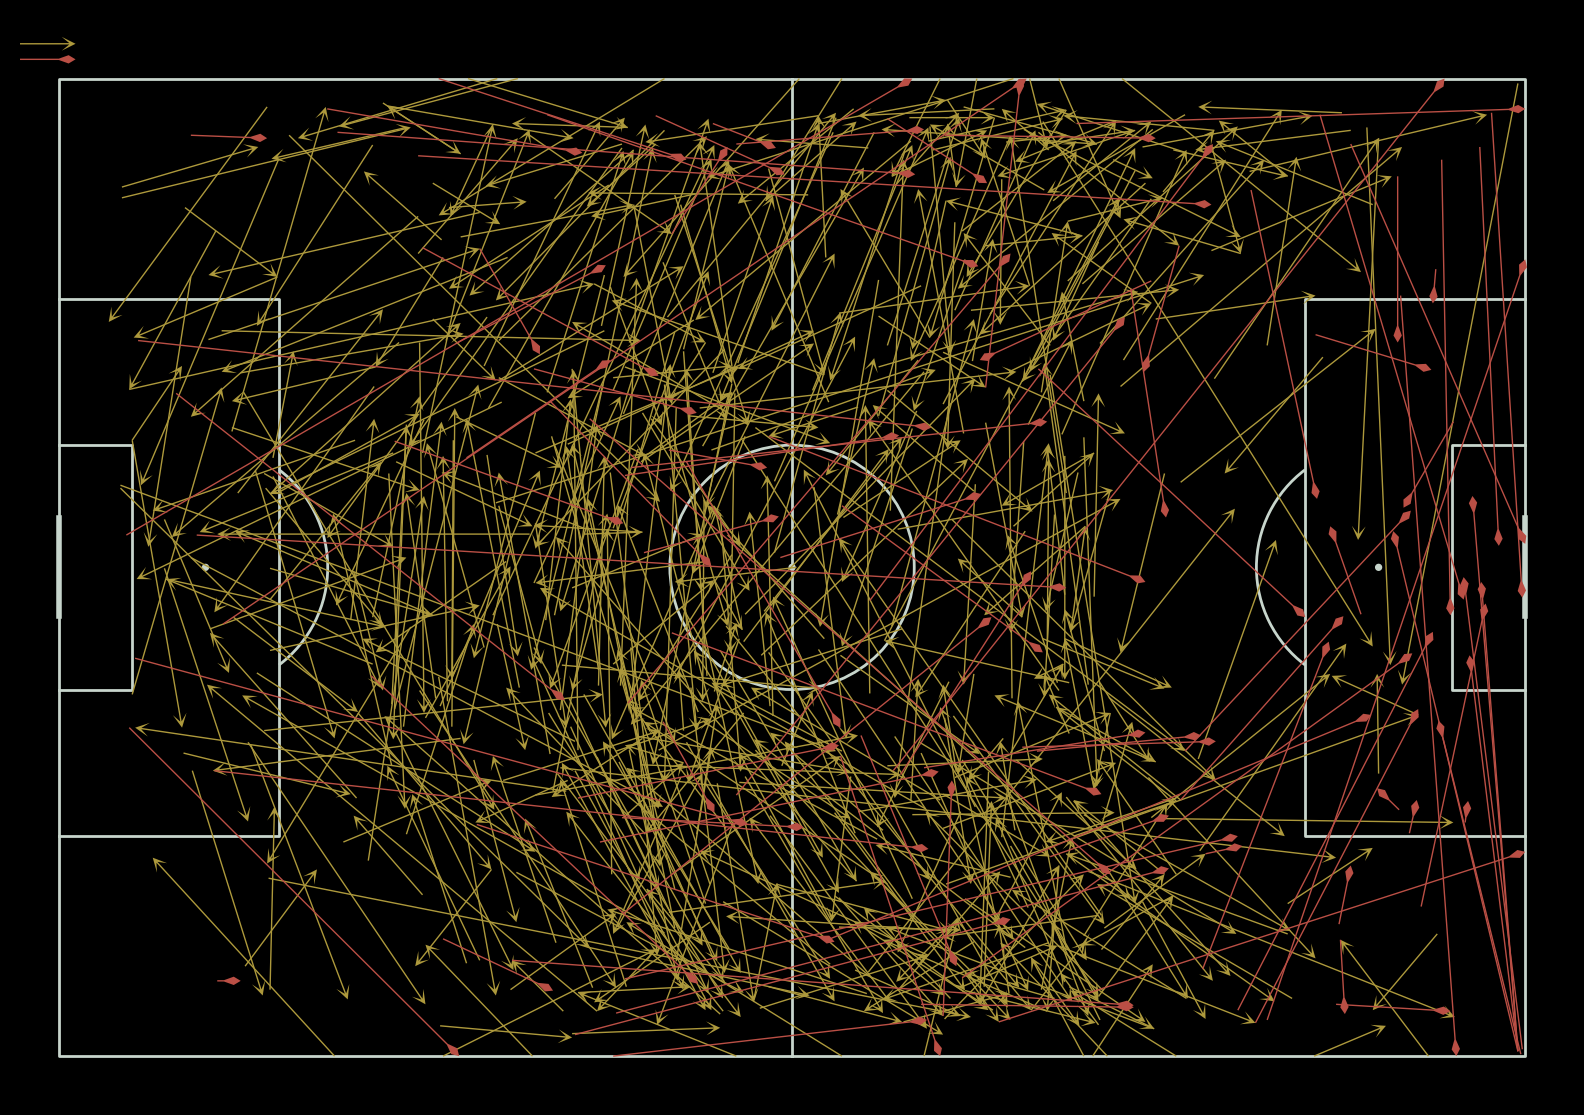

In [7]:
# Team data
team = 'Rangers'
teamId = 306
opponent = 'Celtic'
venue = 'home'

visuals.getTeamTotalPasses(events_df, teamId, team, opponent, pitch_color='#000000')

## Successful box passes

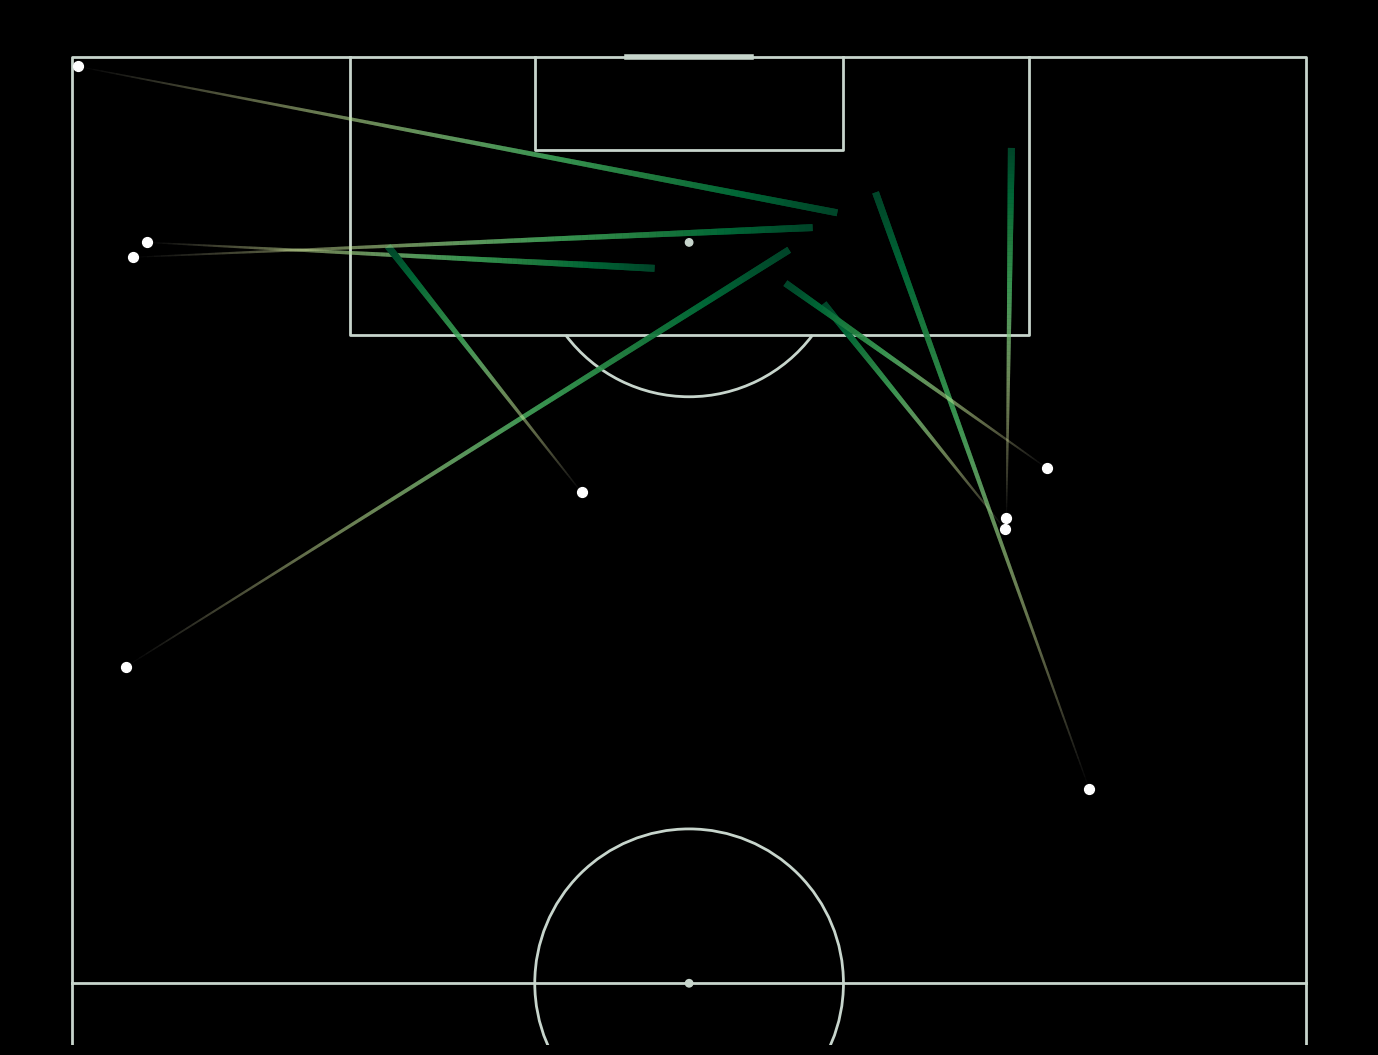

In [10]:
# Team data
team = 'Rangers'
teamId = 306
opponent = 'Celtic'
venue = 'home'

# You can select more cmaps here: https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
# opp_transparent/opp_comet are manually added by me to this visual, you can change it in visuals.py
# If you get an error regarding 'opp_transparent/opp_comet' you probably haven't replaced pitch.py/linecollection.py file
visuals.getTeamSuccessfulBoxPasses(events_df, teamId, team, pitch_color='#000000', cmap='YlGn')

## All passes network

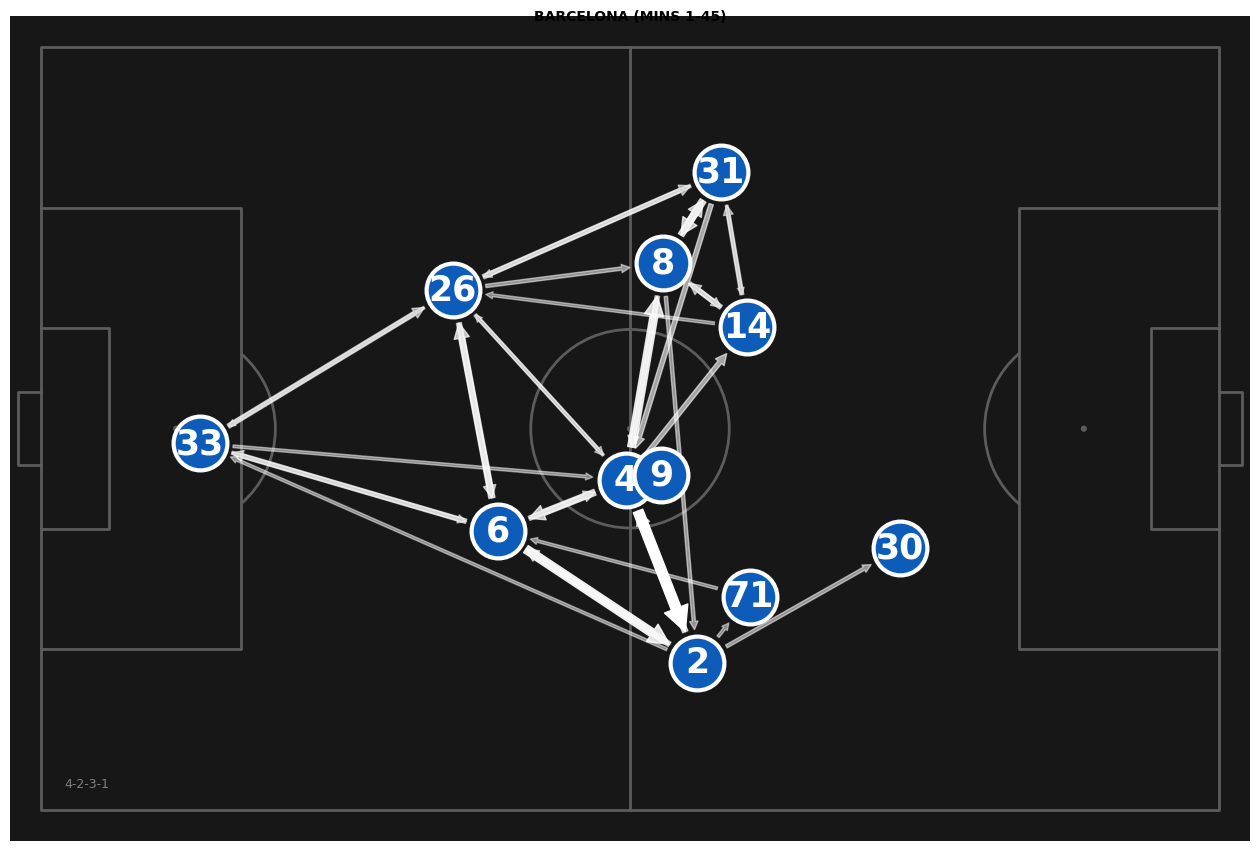

In [12]:
# Team data
team = 'Rangers'
teamId = 306
opponent = 'Celtic'
venue = 'home'

# Create Pass Network     
# you can change marker_label to 'name' as well
fig,ax = plt.subplots(figsize=(16,11))
visuals.createPassNetworks(match_data, events_df, matchId=match_data['matchId'], team='Barcelona', max_line_width=6, 
                           marker_size=1500, edgewidth=3, dh_arrow_width=25, marker_color='#0e5cba',
                           marker_edge_color='w', shrink=24, ax=ax, kit_no_size=25)

## Progressive passes network

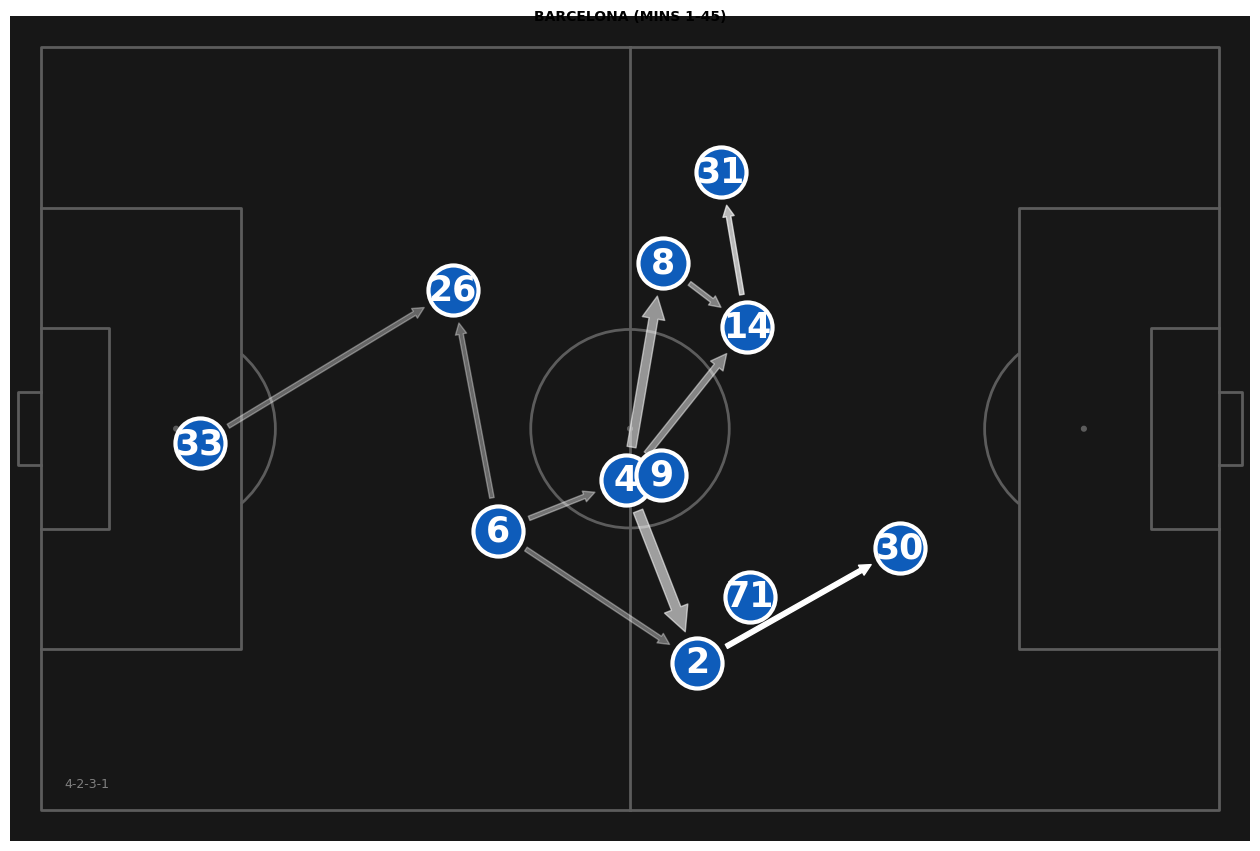

In [13]:
# Team data
team = 'Rangers'
teamId = 306
opponent = 'Celtic'
venue = 'home'

# Create Progressive Pass Network
# you can change marker_label to 'name' as well
fig,ax = plt.subplots(figsize=(16,11))
visuals.createAttPassNetworks(match_data, events_df, matchId=match_data['matchId'], team='Barcelona', max_line_width=6, 
                              marker_size=1300, edgewidth=3, dh_arrow_width=25, marker_color='#0e5cba', 
                              marker_edge_color='w', shrink=24, ax=ax, kit_no_size=25)

# Get shotmap

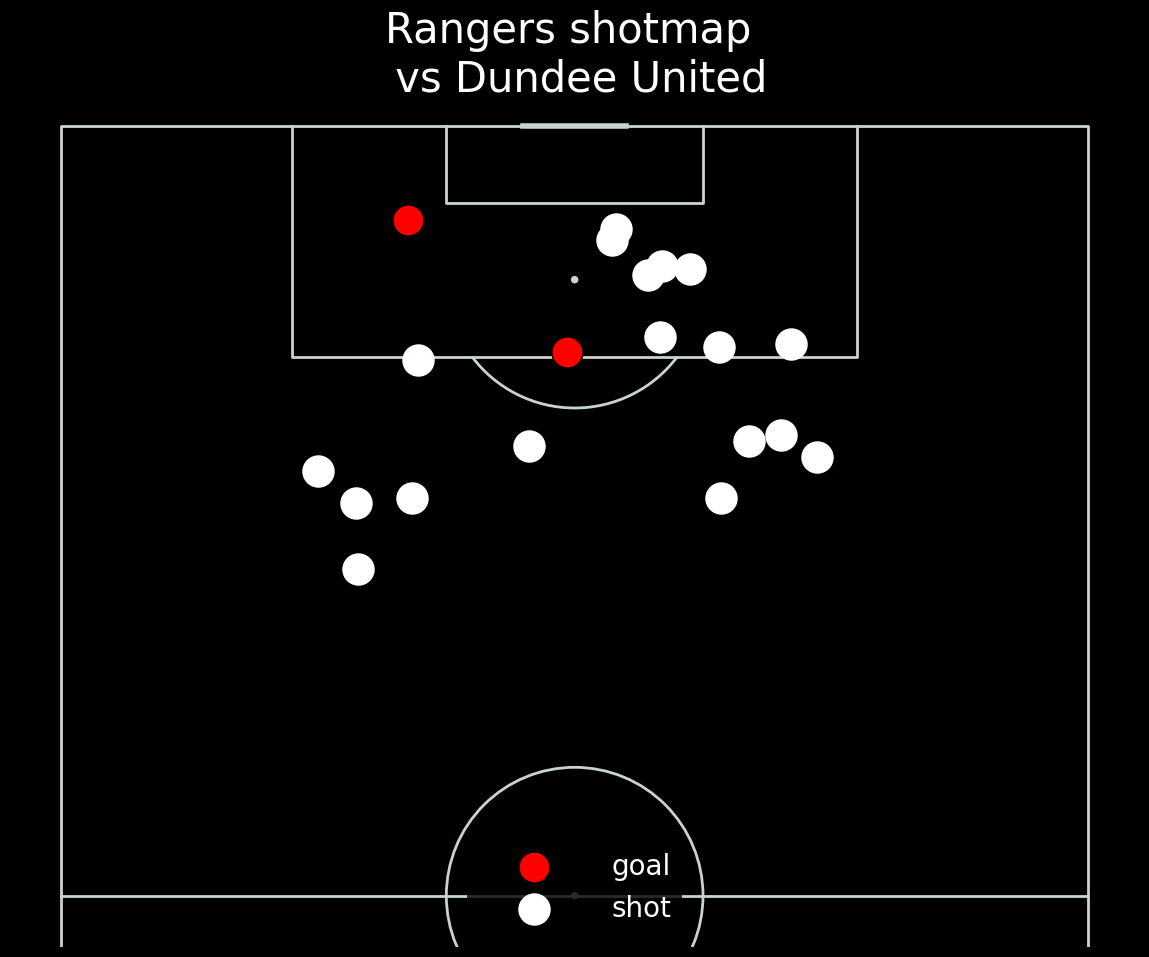

In [14]:
# Team data
team = 'Rangers'
teamId = 306
opponent = 'Celtic'
venue = 'home'

fig,ax = plt.subplots(figsize=(16,11))
visuals.createShotmap(match_data, events_df, team='Rangers', pitchcolor='black', shotcolor='white', 
                      goalcolor='red', titlecolor='white', legendcolor='white', marker_size=500, fig=fig, ax=ax)

# Get PV formation map

In [ ]:
events_dfs["teamId"].value_counts()

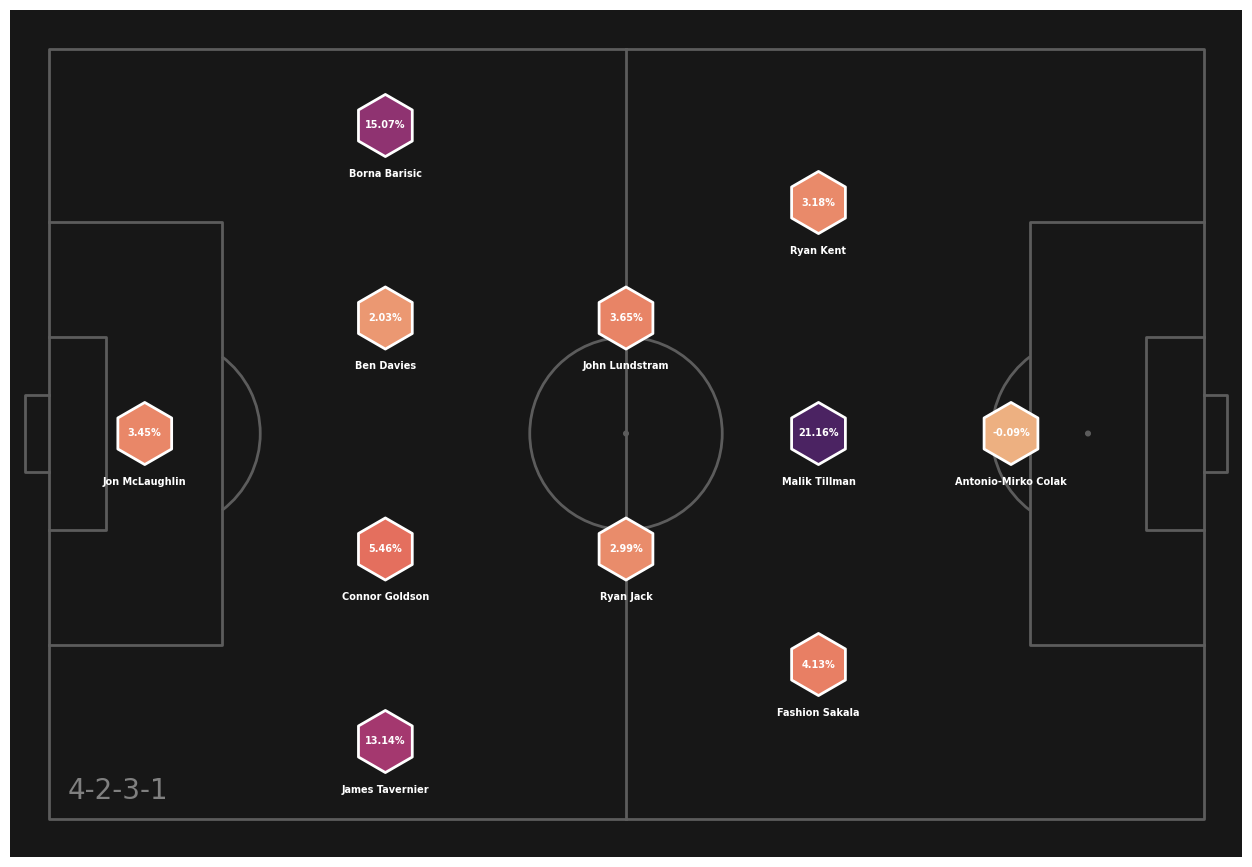

In [15]:
# Team data
team = 'Rangers'
teamId = 306
opponent = 'Celtic'
venue = 'home'

# Choose your color palette from here: https://seaborn.pydata.org/tutorial/color_palettes.html
fig,ax = plt.subplots(figsize=(16,11))
visuals.createPVFormationMap(match_data, events_df, team='Barcelona', color_palette=sns.color_palette("flare", as_cmap=True),
                             markerstyle='h', markersize=2000, markeredgewidth=2, labelsize=7, labelcolor='w', ax=ax)